In [1]:
import TO_sim.Q_simul as QSIM
import TO_sim.analytical.order_sec_parameter as OSP
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform,cauchy
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [2]:
a = None

In [3]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)
imp.reload(OSP)

<module 'TO_sim.analytical.order_sec_parameter' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/order_sec_parameter.py'>

In [242]:
def g_u(x):
    return uniform.pdf(x,-5,10)
def g_sec(x,Or,Om):
    g = uniform.pdf(x+Om,-5,10)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [5]:
def g_c(x):
    return cauchy.pdf(x,0,1)
def g_sec_c(x,Or,Om):
    g = cauchy.pdf(x+Om,0,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [246]:
m = 0.95
# g_n = lambda x: uniform.pdf(x,-5,10)
g_hu = lambda x: uniform.pdf(x,-1,1)
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m,g_n=g_u,K_max=20)
# F_RMhd,F_RMhu,F_R0hd,F_R0hu =  OSP2.Make_R_function(m,g_n=g_hu,K_max=25)

In [230]:
g_fu = lambda x: uniform.ppf(x,-5,10)
# g_fc = lambda x: cauchy.ppf(x,0,1)
N = 2000
K = 3.5
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=4000,start_p=False,seed=10,dt=0.1,g_n =g_fu)
sol = Qsimul.solve()

In [249]:
Ks = np.arange(0,15,0.2)

In [252]:
rs_d,rs_u,rs_dFl,rs_uFl,_,_ = OSP2.get_r_sec_np(Ks,m,F_RMu,g_sec=g_sec,samples=30)

In [248]:
r2_d,r2_u,r2_dl,r2_ul,_,_ = OSP2.get_r_sec_np(,m,F_RMu,g_sec=g_sec,samples=30)
print(r2_u,r2_d,r2_ul,r2_dl)

nan nan nan nan


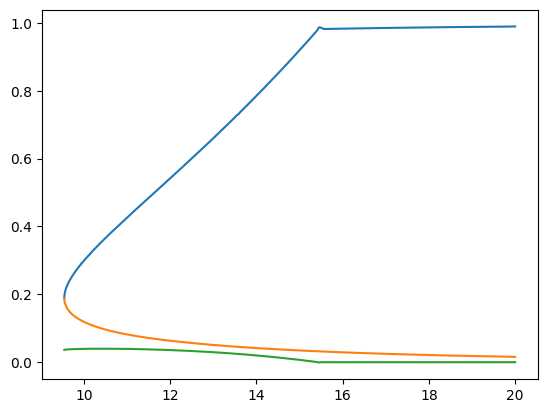

In [253]:
K_ = np.linspace(0,20,10000)
plt.plot(K_,F_RMu(K_))
# plt.plot(K_,F_RMhu(K_))
plt.plot(K_,F_RMd(K_))

plt.plot(K_,(F_R0u(K_)-F_RMu(K_))/2)
plt.plot(Ks,rs_uFl)
plt.plot(Ks,rs_u)

In [148]:
rs_uFl

NameError: name 'rs_uFl' is not defined

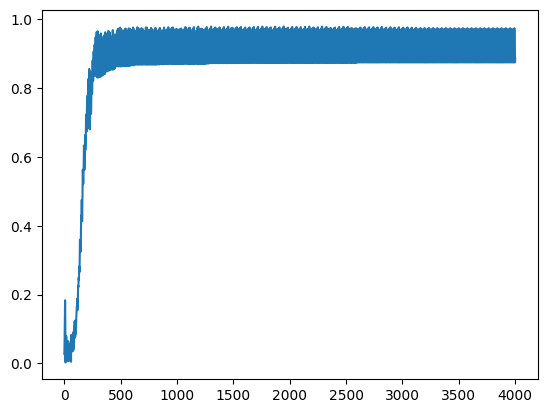

In [231]:
plt.plot(sol['t'],sol['rs'])

In [234]:
cluster_info = Qsimul.get_cluster(sum_time=1000)
r_clu_info = Qsimul.get_r_clu(sum_time=400)

In [239]:
t_mean = r_clu_info['t_mean']
r0 = r_clu_info['r_clu_mean']['0']
rp = r_clu_info['r_clu_mean']['+']
rm = r_clu_info['r_clu_mean']['-']

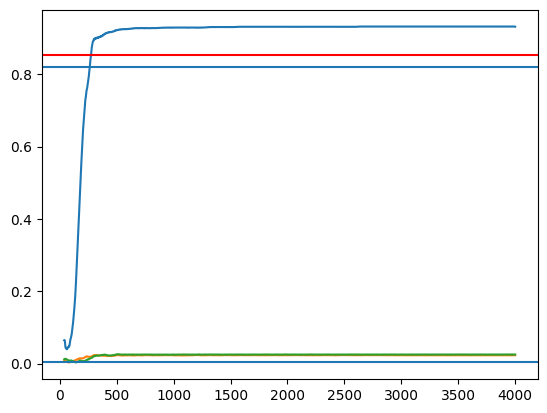

In [240]:
plt.plot(t_mean,r0)
plt.plot(t_mean,rp)
plt.plot(t_mean,rm)
plt.axhline(F_R0u(K),color='red')
# plt.axhline(F_R0hu(K),color='red')
plt.axhline(F_RMu(K))
# plt.axhline(r2_ul)
plt.axhline(r2_u)

In [174]:
_,rptA,_,rpA,_,_ = OSP2.get_r_sec_np(K,m,F_RMu,samples=30)

In [485]:
if np.isnan(rpA):
    rpA = (F_R0u(K)-F_RMu(K))/2
    print(rpA)

In [486]:
K_ = np.linspace(0,15,1000)
I_FR0u = interpolate.interp1d(F_R0u(K_),K_)
K_match = I_FR0u(r0)
O_O = 4/np.pi * np.sqrt(F_RMu(K_match)*K_match/m) - 0.3056*1/np.sqrt(K_match*F_RMu(K_match)*m**3)
shift_O = OSP2.get_shift_O(r0,rp,O_O,K,m)
O_p2 = 4/np.pi * np.sqrt(rp*K/m) - 0.3056*1/np.sqrt(K*rp*m**3)

ValueError: A value (0.011889193144316223) in x_new is below the interpolation range's minimum value (0.15275423503418453).

In [ ]:
t = r_clu_info['t']

In [487]:
rpA

array([0.11082667])

In [488]:
OPM = OSP2.get_OPM(F_RMu(K),K,m)
Rp = (K*F_R0u(K)*rpA)/(2*m*(1/m**2+(OPM)**2))
# Rp = K*F_R0u(K)*rpA/(OPM*(1+m**2*OPM**2))
# K*F_R0u(K)*rpA/(OPM*(1+m**2*OPM**2))

In [489]:
Rp

array([0.03709769])

In [490]:
shift = (K*F_R0u(K)*rpA)/(2*m*(1/m**2+(OPM)**2)) #- (K*rp*rp)/(2*m**2*O_O*(1/m**2+(2*O_O)**2))

In [491]:
plt.plot(t[::10],r_clu_info['r_clu']['0'])
plt.plot(t_mean,r_clu_info['r_total_mean'])
plt.axhline(F_RMu(K),color='red')
plt.axhline(F_R0u(K),color='red')
plt.axhline(F_R0u(K)-2*shift,color='black')

# plt.ylim(0.7,0.85)
plt.axhline(r_clu_info['r_clu']['0'][-1]-2*shift)
# plt.axhline(r_clu_info['r_clu']['0'][-1])

NameError: name 't' is not defined

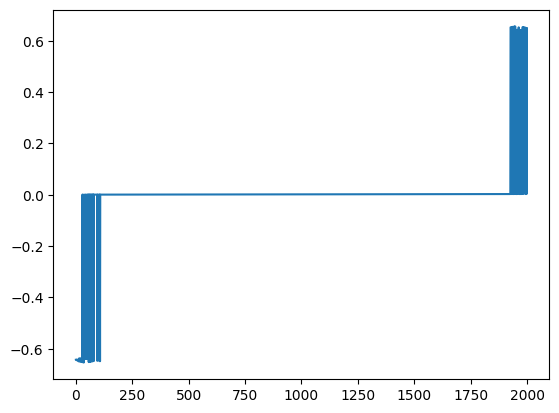

In [241]:
plt.plot(cluster_info['avg_dtheta_last'])
# plt.ylim(-4,4)

ValueError: x and y must have same first dimension, but have shapes (800001,) and (80001,)

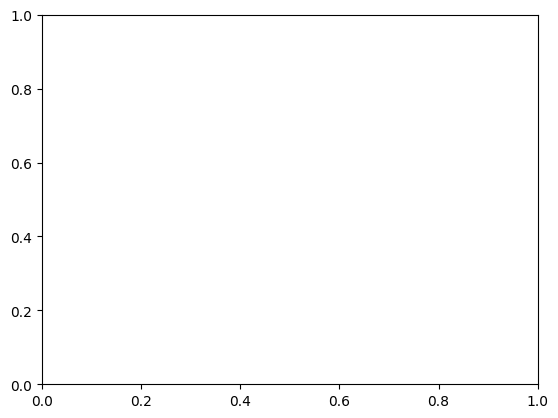

In [350]:
plt.plot(t,r_clu_info['r_clu']['0'])
plt.plot(t_mean,r_clu_info['r_total_mean'])
plt.axhline(F_R0u(K))
plt.axhline(F_RMu(K))
# plt.axhline(F_RMu(K)+Rp,color='red')

# phase diagram

In [135]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import TO_sim.analytical.order_sec_parameter as OSP

In [134]:
N = 5000
temp = glob.glob(rf'./Ensembles/KM space/N = {N} *.npz')

NameError: name 'glob' is not defined

In [136]:
df_new = pd.read_excel(f'N = {N} seed = 10 QNORMAL w pv.xlsm',index_col=[0,1])

In [137]:
ms = np.arange(0,10.05,0.1)
Ks = np.arange(0,10.05,0.1)

In [242]:
df_new.sort_index().to_excel(f'N = {N} seed = 10 QNORMAL wo pv.xlsm')

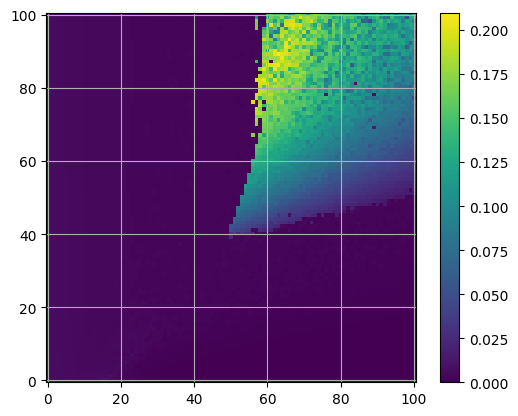

In [138]:
plt.imshow(df_new['sig'].unstack().to_numpy(float).T,origin='lower')
plt.colorbar()
plt.grid()

In [139]:
df_A = pd.read_excel(f'NEW Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_A2 = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])
# df_A2 = pd.read_excel('Order parameter and secondary cluster wo rsecd.xlsm',index_col=[0,1])


(0.0, 10.0)

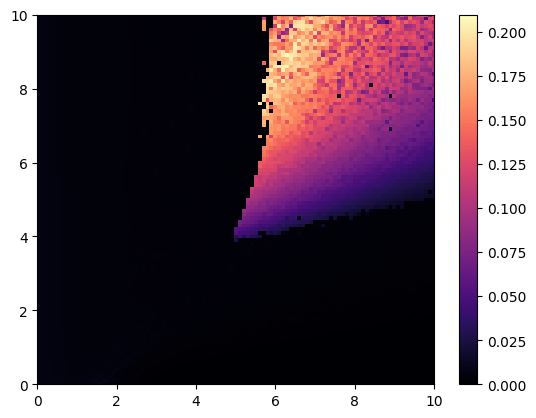

In [140]:
KK = df_new.index.to_frame().K.unstack().to_numpy().T
MM = df_new.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df_new['sig'].unstack().to_numpy(float).T,cmap='magma')
plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)

In [141]:
df_A

rM_u      rM_d      r0_u      r0_d      rd_u      rd_d  \
K    m                                                                  
0.0  0.0        NaN       NaN       NaN       NaN       NaN       NaN   
     0.1        NaN       NaN       NaN       NaN       NaN       NaN   
     0.2        NaN       NaN       NaN       NaN       NaN       NaN   
     0.3        NaN       NaN       NaN       NaN       NaN       NaN   
     0.4        NaN       NaN       NaN       NaN       NaN       NaN   
...             ...       ...       ...       ...       ...       ...   
10.0 9.6   0.652310  0.001509  0.701609  0.008940  0.049299  0.007430   
     9.7   0.647663  0.001509  0.697401  0.008930  0.049738  0.007421   
     9.8   0.643046  0.001507  0.693214  0.008917  0.050168  0.007410   
     9.9   0.638467  0.001505  0.689056  0.008902  0.050589  0.007396   
     10.0  0.633914  0.001503  0.684914  0.008885  0.051001  0.007382   

              r+_ul  r+_drift        mu  r+_total_u  r+_total_d  r+_total_ul  \
K    m                                                                         
0.0  0.0        NaN       NaN       NaN         NaN         NaN          NaN   
     0.1        NaN       NaN       NaN         NaN         NaN          NaN   
     0.2        NaN       NaN       NaN         NaN         NaN          NaN   
     0.3        NaN       NaN       NaN         NaN         NaN          NaN   
     0.4        NaN       NaN       NaN         NaN         NaN          NaN   
...             ...       ...       ...         ...         ...          ...   
10.0 9.6   0.109917  0.024649 -0.084670    0.109917         NaN          NaN   
     9.7   0.111944  0.024869 -0.080451    0.111944         NaN          NaN   
     9.8   0.113953  0.025084 -0.076216    0.113953         NaN          NaN   
     9.9   0.115971  0.025294 -0.071894    0.115971         NaN          NaN   
     10.0  0.117957  0.025500 -0.067603    0.117957         NaN          NaN   

           r+_total_ud  
K    m                  
0.0  0.0           NaN  
     0.1           NaN  
     0.2           NaN  
     0.3           NaN  
     0.4           NaN  
...                ...  
10.0 9.6           NaN  
     9.7           NaN  
     9.8           NaN  
     9.9           NaN  
     10.0          NaN  

[10201 rows x 13 columns]

In [142]:
RP = df_new['r+'].unstack().to_numpy(float).T
R0 = df_new['r0'].unstack().to_numpy(float).T
RM = df_new['rm'].unstack().to_numpy(float).T
RPA = df_A['r+_ul'].unstack().to_numpy(float).T[:101,:101]
R0A = df_A['r0_u'].unstack().to_numpy(float).T[:101,:101]
RMA = df_A['rM_u'].unstack().to_numpy(float).T[:101,:101]

RPA2 = df_A2['r_sec_u'].unstack().to_numpy(float).T
R0A2 = df_A2['r_main_u'].unstack().to_numpy(float).T

In [172]:
KKA = df_A.index.to_frame().K.unstack().to_numpy().T
MMA = df_A.index.to_frame().m.unstack().to_numpy().T

KKA2 = df_A2.index.to_frame().K.unstack().to_numpy().T
MMA2 = df_A2.index.to_frame().m.unstack().to_numpy().T
r_ul = df_A['r+_ul'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_0 = df_A['r0_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_m = df_A['rM_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T

r_ul2 = df_A2['r_sec_ul'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_02 = df_A2['r_main_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
RSTD = OSP.get_rstd(r_m,r_0,r_ul,KKA,MMA)
SIG = df_new['sig'].unstack().to_numpy(float).T

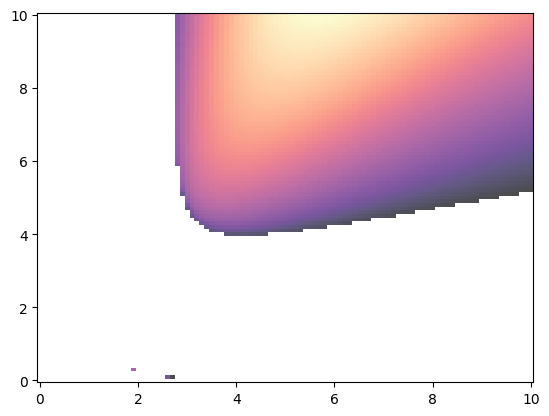

In [173]:
plt.pcolormesh(KKA,MMA,RSTD,cmap='magma',alpha=0.7)


In [66]:
plt.pcolormesh(KK,MM,abs(np.where(~np.isnan(R0),SIG,np.nan)-RSTD),cmap='tab20b',vmax=0.05)
# plt.pcolormesh(KKA,MMA,RSTD,cmap='magma',alpha=0.7)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

NameError: name 'KK' is not defined

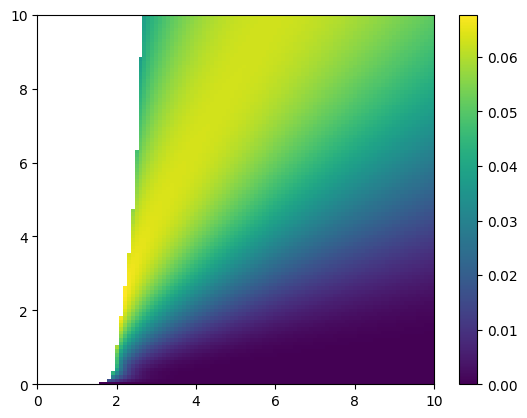

In [146]:
plt.pcolormesh(KK,MM,abs(RMA-R0A))

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [161]:
OPM = OSP2.get_OPM(RMA,KK,MM)
# Rp = KK*RP*R0A/(OPM*(1+MM**2*OPM**2))
Rp = (KK*R0A*RPA)/(MM*(1/MM**2+(OPM)**2)) 

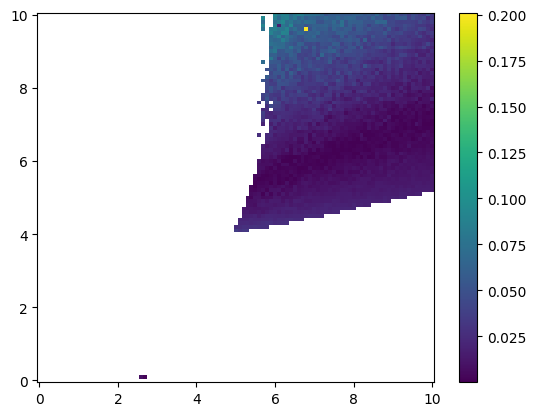

In [162]:
plt.pcolormesh(KK,MM,abs((R0-Rp)-RM),)
plt.colorbar()

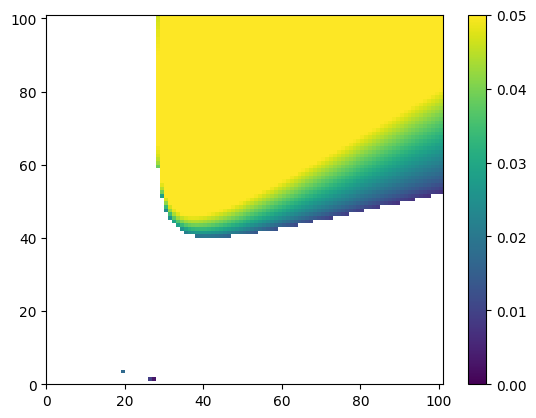

In [163]:
plt.pcolormesh(Rp,vmin=0,vmax=0.05)
plt.colorbar()

In [153]:
np.nansum(np.dstack((RMA,Rp)),axis=2)

array([[0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       [0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       [0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       ...,
       [0.        , 0.        , 0.        , ..., 0.69894507, 0.69856624,
        0.68951468],
       [0.        , 0.        , 0.        , ..., 0.64666901, 0.70287452,
        0.70286771],
       [0.        , 0.        , 0.        , ..., 0.69600604, 0.66859669,
        0.6985325 ]])

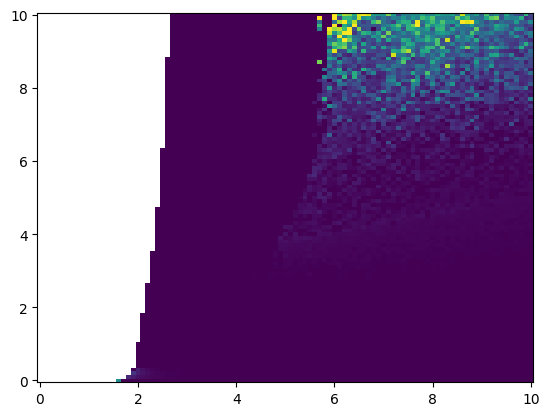

In [154]:
plt.pcolormesh(KK,MM,RM - RMA,vmax=0.2,vmin=0)

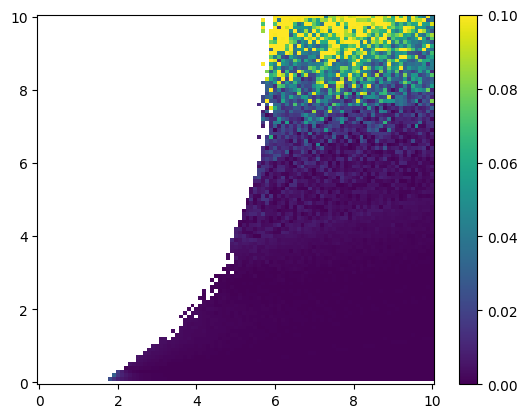

In [157]:
plt.pcolormesh(KK,MM,abs(np.where(~np.isnan(R0),RM,np.nan) - RMA),vmin=0.,vmax=0.1)
plt.colorbar()


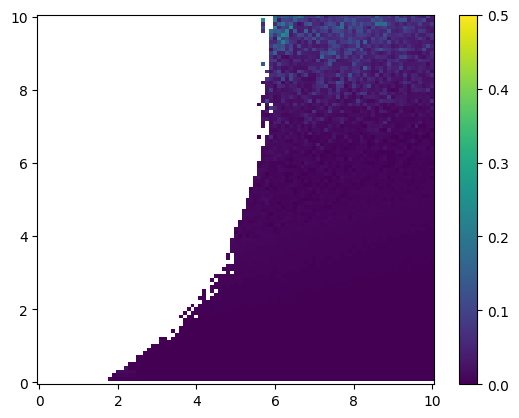

In [159]:
# plt.pcolormesh(KK,MM,abs(R0 - np.nansum(np.dstack((R0A,)),axis=2)),vmin=0.,vmax=0.1)
plt.pcolormesh(KK,MM,abs(R0 - R0A),vmin=0.,vmax=0.5)
# plt.pcolormesh(KK,MM,abs(R0 - RM),vmin=0.,vmax=0.1)
plt.colorbar()

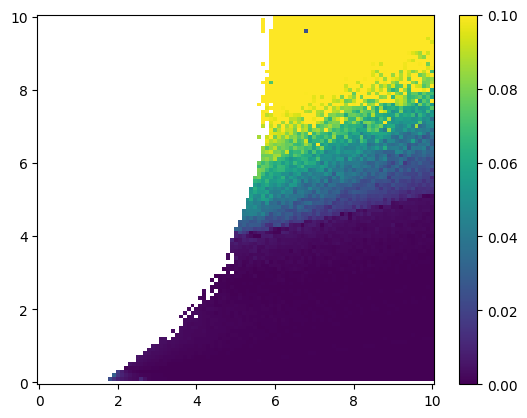

In [164]:
plt.pcolormesh(KK,MM,abs(np.where(~np.isnan(R0),RM,np.nan) - np.nansum(np.dstack((RMA,-Rp)),axis=2)),vmin=0.,vmax=0.1)
plt.colorbar()

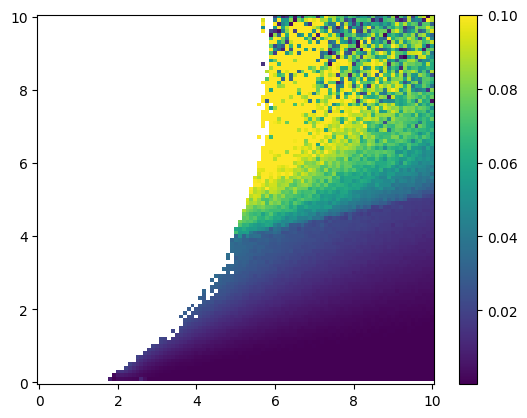

In [169]:
plt.pcolormesh(KK,MM,abs((np.where(~np.isnan(R0),RM,np.nan) - np.nansum(np.dstack((R0A,Rp)),axis=2))),vmax=0.1)
plt.colorbar()

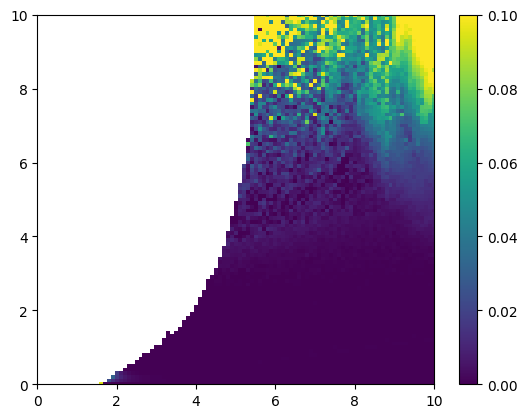

In [131]:
plt.pcolormesh(KK,MM,(np.where(~np.isnan(R0),RM,np.nan) - RMA[:101,:101]),vmax=0.1,vmin=0)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

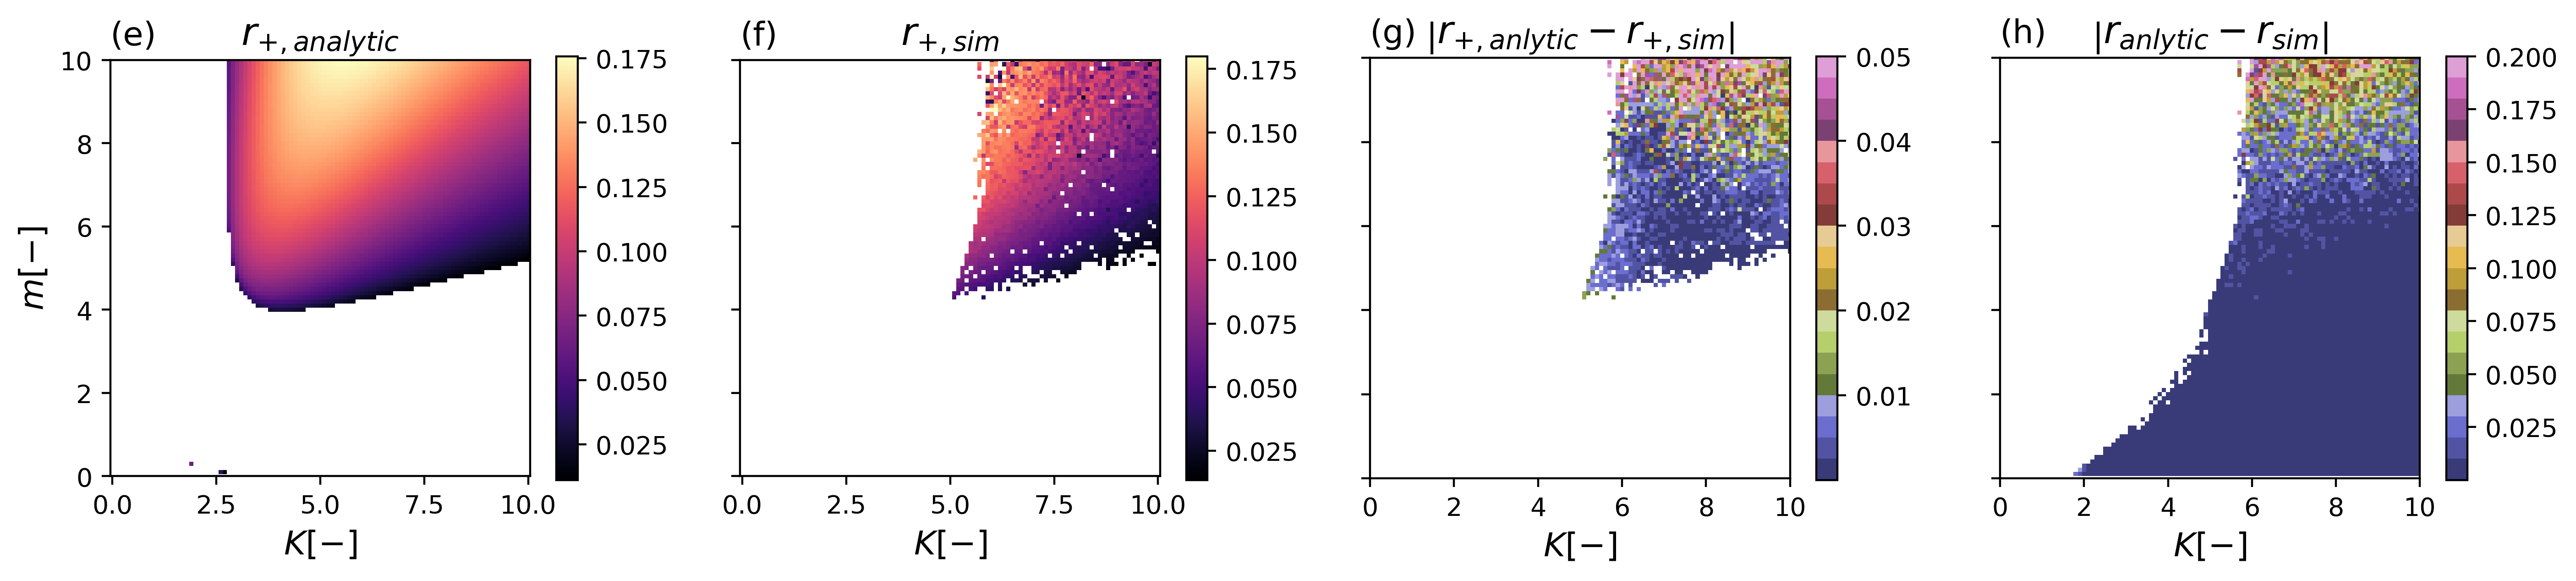

In [180]:
P = RP - RPA[:101,:101]
fig,axs = plt.subplots(1,4,figsize=(17,4),sharey=True,dpi=400)
plt.sca(axs[0])
plt.pcolormesh(KK,MM,RPA,cmap='magma')
plt.colorbar(shrink=0.75)
plt.ylabel(r'$m[-]$',fontsize=13)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.title(r'$r_{+,analytic}$',fontsize=15)
plt.gca().set_aspect('equal')
plt.title('(e)',fontsize=13,loc='left')

plt.sca(axs[1])
plt.pcolormesh(KK,MM,RP,vmax=0.18,cmap='magma')
plt.gca().set_aspect('equal')
plt.colorbar(shrink=0.75)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.title(r'$r_{+,sim}$',fontsize=15)
plt.title('(f)',fontsize=13,loc='left')

plt.sca(axs[2])
plt.pcolormesh(KK,MM,abs(P),vmax=0.05,cmap='tab20b')#cmap='cividis'
plt.xlim(0,10)
plt.ylim(0,10)

plt.title('(g)',fontsize=13,loc='left')

plt.xlabel(r'$K[-]$',fontsize=13)
plt.colorbar(shrink=0.75)
plt.title(r'$\left|r_{+,anlytic} - r_{+,sim}\right|$',fontsize=15)
plt.gca().set_aspect('equal')

plt.sca(axs[3])
plt.pcolormesh(KK,MM,abs(np.where(~np.isnan(R0),RM,np.nan) - RMA[:101,:101]),vmax=0.2,cmap='tab20b')

plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.colorbar(shrink=0.75)
plt.title('(h)',fontsize=13,loc='left')
plt.title(r'$\left|r_{anlytic} - r_{sim}\right|$',fontsize=15)
plt.gca().set_aspect('equal')

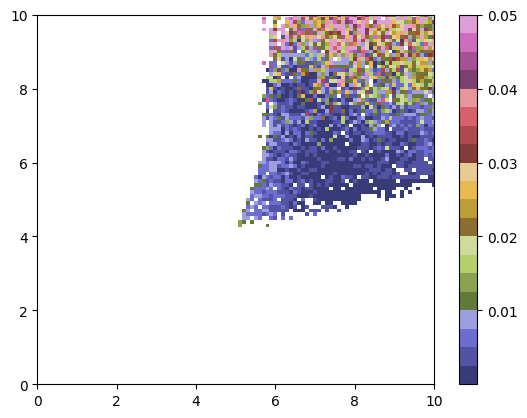

In [182]:
# plt.pcolormesh(KKA2,MMA2,abs(RP[1:,1:] - RPA2),vmax=0.05,cmap='Set2')
plt.pcolormesh(KKA,MMA,abs(RP - RPA[:101,:101]),vmax=0.05,cmap='tab20b')

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [ ]:
RSTD_ = df_new['sig'].unstack().to_numpy(float).T


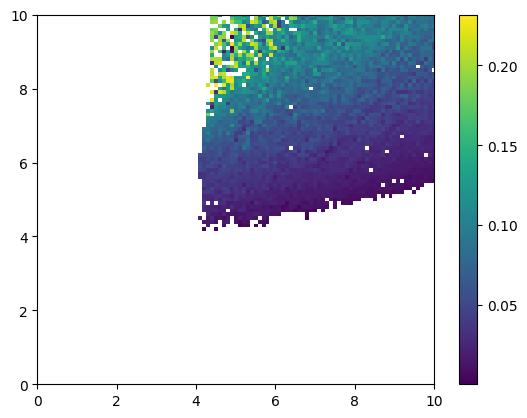

In [ ]:
plt.pcolormesh(KK,MM,abs(RP - RSTD[:101,:101]),)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [ ]:
plt.pcolormesh(KK,MM,abs(RP - RPA[:101,:101]),)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

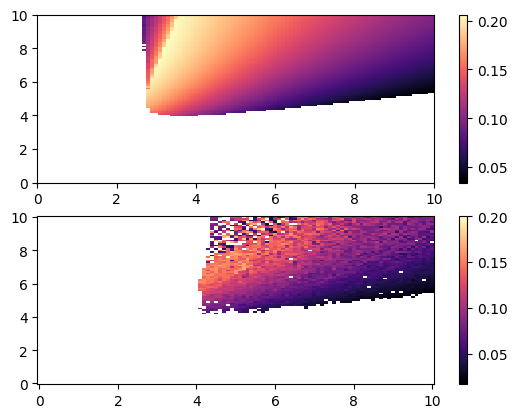

In [ ]:
plt.subplot(212)

plt.pcolormesh(KK,MM,df_new['r+'].unstack().to_numpy(float).T,cmap='magma',vmax=0.2)
plt.colorbar()
plt.subplot(211)
plt.pcolormesh(KKA,MMA,df_A['r_sec_ul'].unstack().to_numpy(float).T,cmap='magma',alpha=1)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [254]:
import numpy as np
import TO_sim.analytical.sec_order_parameter2 as OSP2

In [255]:
a = np.arange(-3,3,0.01)

In [256]:
from scipy.stats import uniform
from scipy.stats import cauchy

In [272]:
def g_u(x):
    return uniform.pdf(x,-3,6)
def g_sec(x,Or,Om):
    g = uniform.pdf(x+Om,-3,6)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)


In [258]:
def g_u(x):
    return cauchy.pdf(x,0,1)
def g_sec(x,Or,Om):
    g = cauchy.pdf(x+Om,0,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [259]:
x_ = np.linspace(-6,7,10000)

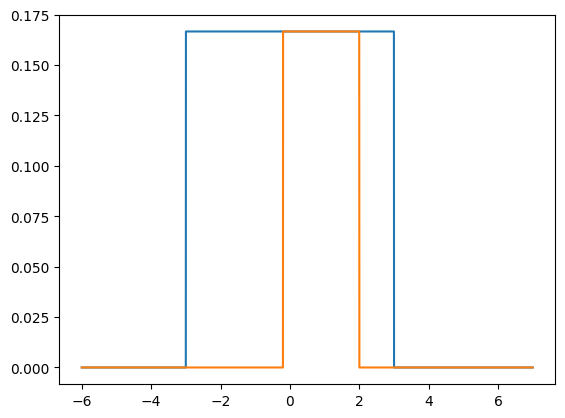

In [274]:
plt.plot(x_,g_u(x_))
plt.plot(x_,g_sec(x_,1.2,1))

In [281]:
OPM

0.8830289695706575

In [325]:
m = 5
K = 5
OPM = OSP2.get_OPM(0.7,K,m)
OPM
# F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m,g_n=g_u,K_max=5.1)
# F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

1.050658156761852

In [298]:
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m,g_n=g_u,K_max=30)

In [310]:
K_ = np.linspace(0,30,10000)

In [320]:
get_K = interpolate.interp1d(F_RMu(K_),K_,kind='linear',bounds_error=False)

In [340]:
F_R0u()

array(0.24415491)

In [341]:
K_match = get_K(0.3)
OPM = OSP2.get_OPM(0.3,K_match,m)
K_match,OPM

(array(13.54481875), 1.1342564487186075)

In [342]:
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,OPM,g_n=g_u,)

In [322]:
get_K(0.7)

array(22.97910183)

In [297]:
K_match = get_K(0.7)
K_match

array(nan)

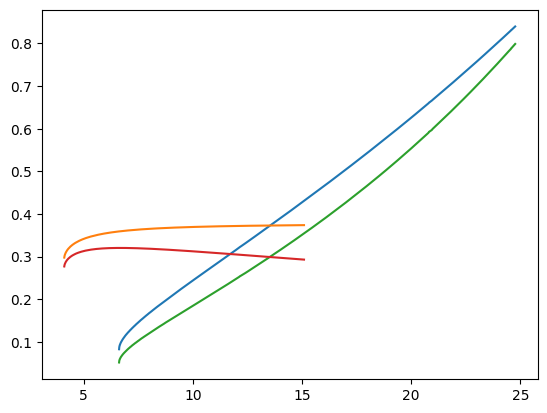

In [344]:
plt.plot(K_,F_R0u(K_))
plt.plot(K_,F0_R0u(K_))

plt.plot(K_,F_RMu(K_))
plt.plot(K_,F0_RMu(K_))

In [267]:
Ks =  np.arange(0,15,0.1)

In [336]:
# rs_d,rs_u,rs_dFl,rs_uFl,_,_ = OSP2.get_r_sec_np(Ks,m,F_RMu,samples=30)
rs_d,rs_u,rs_dFl,rs_uFl,_,_ = OSP2.get_r_sec_np(5,m,F0_RMu,g_sec=g_sec,samples=30)

In [337]:
print(rs_uFl)

[0.05182215]


In [269]:
K_ = np.linspace(0,15,10000)

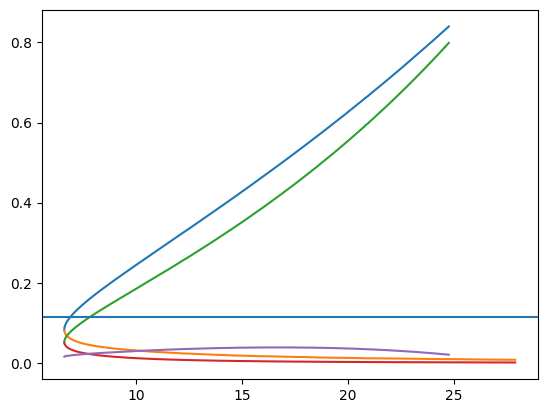

In [331]:
plt.plot(K_,F_R0u(K_))
plt.plot(K_,F_R0d(K_))

plt.plot(K_,F_RMu(K_))
plt.plot(K_,F_RMd(K_))
plt.plot(K_,(F_R0u(K_)-F_RMu(K_))/2)
# plt.plot(Ks,rs_uFl)
plt.axhline(rs_uFl)